# Comparison between Nestorov and normal momentum approaches 

## Import libreries and define global variables

In [55]:
import numpy as np
from matplotlib import pyplot as plt
from NeuralNetwork import NeuralNetwork
from utils import get_data, onehot_encoding, grid_search, save_dict_to_file, load_dict_from_file
from Layer import Layer, Input
from functions import accuracy, MSE, MEE
import pandas as pd

In [56]:
DIR = '/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/' # Directory of the package.

## Import datasets

### Import MONK datasets

In [57]:
df = get_data(f'{DIR}data/MONK/monks-1.train')
df_test = get_data(f'{DIR}data/MONK/monks-1.test')

X_train_monk, y_train_monk = df.drop(columns=['target','id']).to_numpy().T, df['target'].apply(lambda x: int(x)).to_numpy().T
X_test_monk, y_test_monk = df_test.drop(columns=['target','id']).to_numpy().T, df_test['target'].apply(lambda x: int(x)).to_numpy().T

### Import CUP dataset

Define the fraction of dataset which will represent the internal test set.

In [58]:
test_frac = 1/4

In [59]:
names = ['id', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 
         'feature_7', 'feature_8', 'feature_9', 'feature_10', 'target_x', 'target_y','target_z']

df = pd.read_csv(f"{DIR}data/ML-CUP23-TR.csv", names=names, comment='#')

targets = ['target_x', 'target_y', 'target_z']
features = list(set(names) - {'id', 'target_x', 'target_y', 'target_z'})

df = df.sample(frac=1)

train_test_div = round((1-test_frac) * df.shape[0])

X_train_cup, y_train_cup = df[:train_test_div][features].to_numpy().T, df[:train_test_div][targets].to_numpy().T
X_test_cup, y_test_cup = df[train_test_div:][features].to_numpy().T, df[train_test_div:][targets].to_numpy().T

## Data preprocessing

### MONK preprocessing

Process one hot encoding on training and test sets.

In [60]:
X_train_monk = onehot_encoding(X_train_monk)
X_test_monk = onehot_encoding(X_test_monk)

### CUP preprocessing

Decide which data preprocessing method apply to cup training set:
+ MinMax normalization (preprocessing = 1)
+ Standardization (preprocessing = 2)

In [61]:
preprocessing = 0

In [62]:
if preprocessing == 1:
    X_train_cup = minmax_norm(X_train_cup)
    X_test_cup = minmax_norm(X_test_cup)
elif preprocessing == 2:
    X_train_cup = standard(X_train_cup)
    X_test_cup = standard(X_test_cup)

## MONK

Define training and model hyperparameters

In [63]:
orig_params = {'hidden_dim': 4,
        'hidden_act_func': 'tanh',
        'eta': 0.5,
        'lam': 0.0,
        'alpha': 0.9,
        'n_batch': 99,
        'use_opt':0,
        'nest': False,
        'l1_reg' : False,
        'epochs' : 500
        }

seed = np.random.randint(10,10000)

### Normal momentum

Build model

In [64]:
params = orig_params.copy()
input_layer = Input(17)
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'), init_weights_mode='rand')
output_layer = Layer(hidden_layer, 1, 'sigm', init_weights_mode='rand')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])

init_weights_list = model.get_initial_weights_list()

Training with normal momentum:

In [65]:
np.random.seed(seed)
params['nest'] = False
history_nonest = model.train(X_train_monk, y_train_monk.reshape((1,X_train_monk.shape[1])),
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None,
                                    **params
                                    )

Epoch 0: train_loss: 7.031e-01, val_loss: 7.017e-01; train_accuracy: 5.253e+01, val_accuracy: 5.200e+01  train_MSE: 2.548e-01, val_MSE: 2.543e-01  lr : 0.5
Epoch 1: train_loss: 6.880e-01, val_loss: 6.837e-01; train_accuracy: 5.455e+01, val_accuracy: 5.600e+01  train_MSE: 2.474e-01, val_MSE: 2.454e-01  lr : 0.5
Epoch 2: train_loss: 6.738e-01, val_loss: 6.678e-01; train_accuracy: 6.061e+01, val_accuracy: 6.400e+01  train_MSE: 2.404e-01, val_MSE: 2.374e-01  lr : 0.5
Epoch 3: train_loss: 6.620e-01, val_loss: 6.561e-01; train_accuracy: 6.465e+01, val_accuracy: 6.800e+01  train_MSE: 2.345e-01, val_MSE: 2.317e-01  lr : 0.5
Epoch 4: train_loss: 6.499e-01, val_loss: 6.457e-01; train_accuracy: 6.061e+01, val_accuracy: 6.400e+01  train_MSE: 2.287e-01, val_MSE: 2.269e-01  lr : 0.5
Epoch 5: train_loss: 6.338e-01, val_loss: 6.322e-01; train_accuracy: 6.263e+01, val_accuracy: 6.400e+01  train_MSE: 2.211e-01, val_MSE: 2.207e-01  lr : 0.5
Epoch 6: train_loss: 6.125e-01, val_loss: 6.131e-01; train_accur

Epoch 155: train_loss: 3.331e-03, val_loss: 1.133e-02; train_accuracy: 1.000e+02, val_accuracy: 1.000e+02  train_MSE: 2.196e-05, val_MSE: 1.065e-03  lr : 0.5
Epoch 156: train_loss: 3.302e-03, val_loss: 1.128e-02; train_accuracy: 1.000e+02, val_accuracy: 1.000e+02  train_MSE: 2.154e-05, val_MSE: 1.059e-03  lr : 0.5
Epoch 157: train_loss: 3.274e-03, val_loss: 1.123e-02; train_accuracy: 1.000e+02, val_accuracy: 1.000e+02  train_MSE: 2.113e-05, val_MSE: 1.054e-03  lr : 0.5
Epoch 158: train_loss: 3.246e-03, val_loss: 1.117e-02; train_accuracy: 1.000e+02, val_accuracy: 1.000e+02  train_MSE: 2.074e-05, val_MSE: 1.048e-03  lr : 0.5
Epoch 159: train_loss: 3.219e-03, val_loss: 1.112e-02; train_accuracy: 1.000e+02, val_accuracy: 1.000e+02  train_MSE: 2.036e-05, val_MSE: 1.042e-03  lr : 0.5
Epoch 160: train_loss: 3.192e-03, val_loss: 1.107e-02; train_accuracy: 1.000e+02, val_accuracy: 1.000e+02  train_MSE: 1.999e-05, val_MSE: 1.036e-03  lr : 0.5
Epoch 161: train_loss: 3.166e-03, val_loss: 1.102e-0

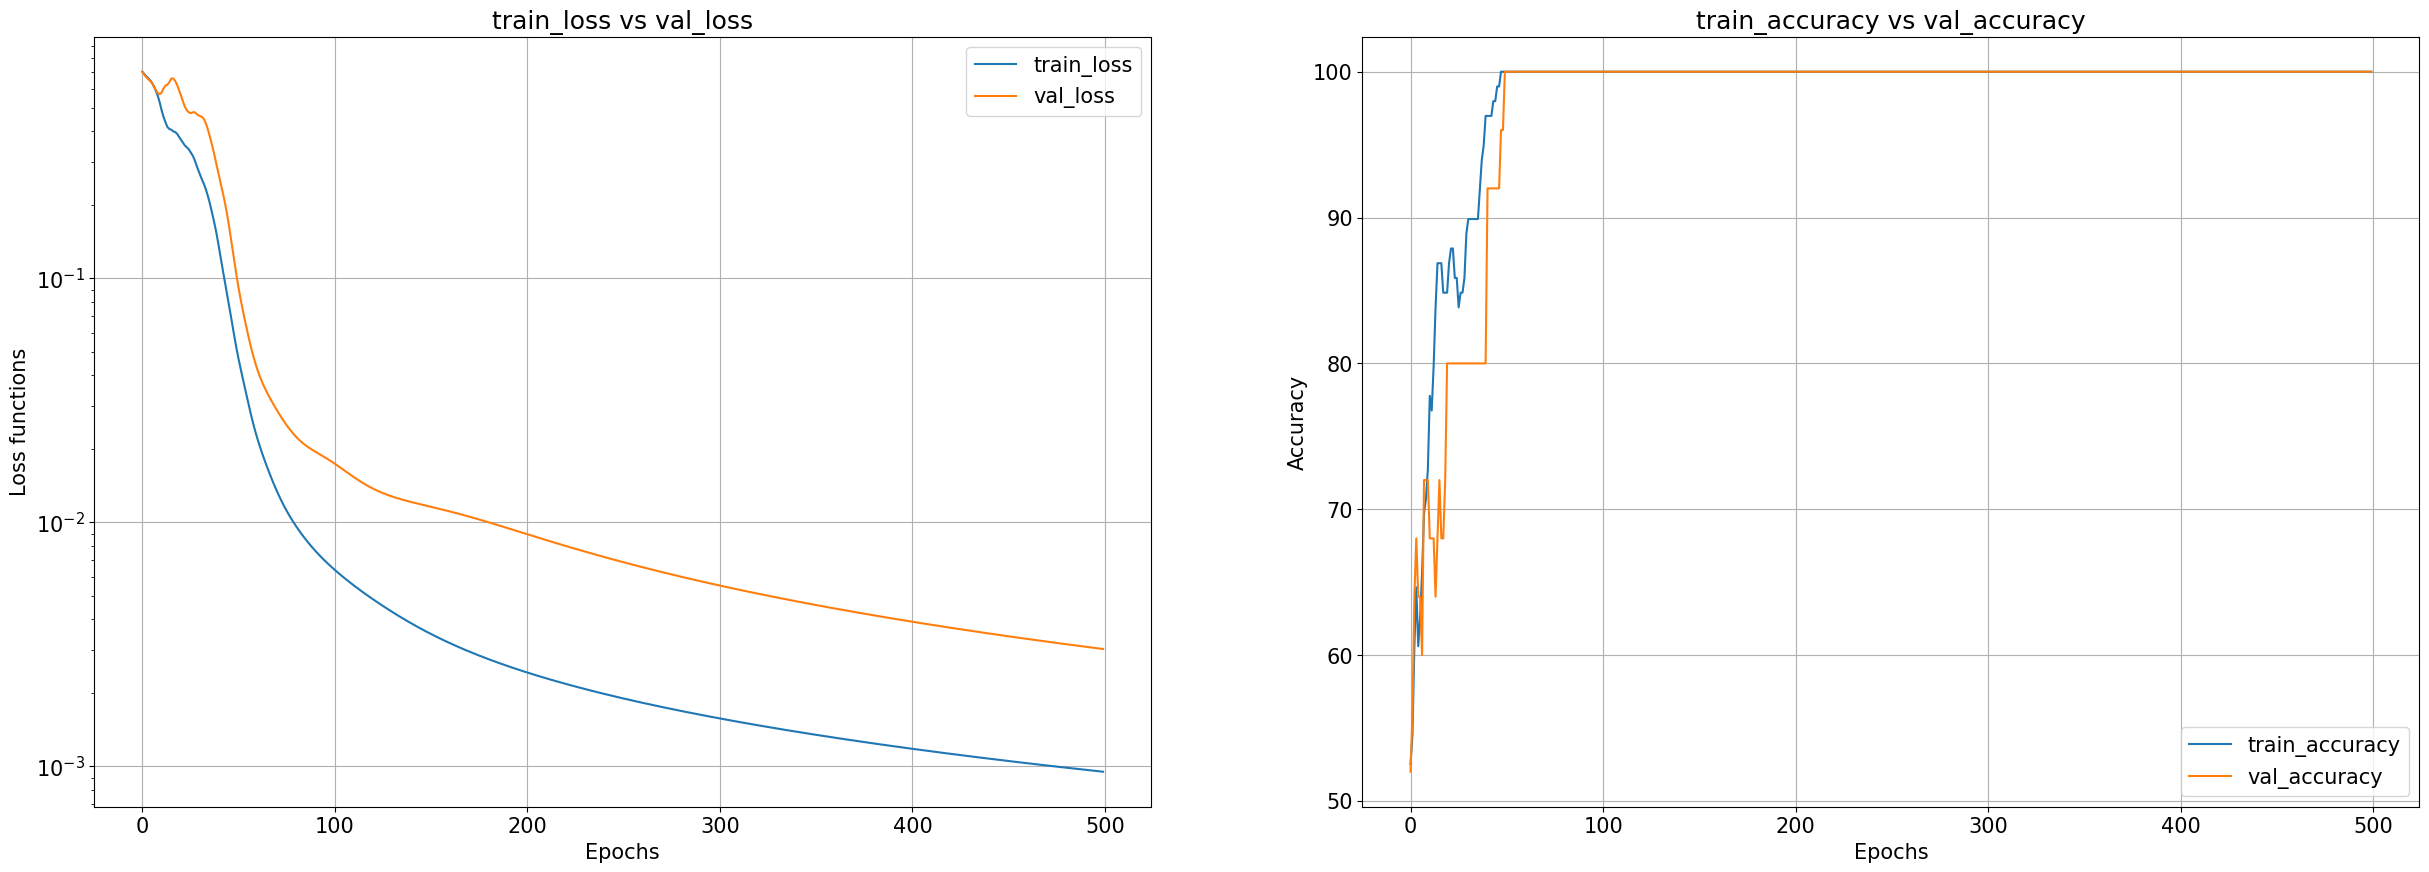

In [66]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_nonest['train_loss'],label='train_loss')
plt.plot(history_nonest['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_nonest['train_accuracy'],label='train_accuracy')
plt.plot(history_nonest['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

### Nestorov momentum


Build model


In [67]:
params = orig_params.copy()
input_layer = Input(17)
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
output_layer = Layer(hidden_layer, 1, 'sigm')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])

model.set_initial_weights(init_weights_list)
arr = model.get_initial_weights_list()

Training with Nestorov momentum:


In [68]:
np.random.seed(seed)
params['nest'] = True
history_nest = model.train(X_train_monk, y_train_monk.reshape((1,X_train_monk.shape[1])),
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None,
                                    **params
                                    )


Epoch 0: train_loss: 7.031e-01, val_loss: 7.017e-01; train_accuracy: 5.253e+01, val_accuracy: 5.200e+01  train_MSE: 2.548e-01, val_MSE: 2.543e-01  lr : 0.5
Epoch 1: train_loss: 6.886e-01, val_loss: 6.844e-01; train_accuracy: 5.051e+01, val_accuracy: 5.600e+01  train_MSE: 2.477e-01, val_MSE: 2.457e-01  lr : 0.5
Epoch 2: train_loss: 6.742e-01, val_loss: 6.679e-01; train_accuracy: 6.263e+01, val_accuracy: 6.000e+01  train_MSE: 2.406e-01, val_MSE: 2.375e-01  lr : 0.5
Epoch 3: train_loss: 6.602e-01, val_loss: 6.533e-01; train_accuracy: 6.667e+01, val_accuracy: 6.400e+01  train_MSE: 2.337e-01, val_MSE: 2.303e-01  lr : 0.5
Epoch 4: train_loss: 6.450e-01, val_loss: 6.390e-01; train_accuracy: 6.869e+01, val_accuracy: 6.800e+01  train_MSE: 2.263e-01, val_MSE: 2.234e-01  lr : 0.5
Epoch 5: train_loss: 6.265e-01, val_loss: 6.237e-01; train_accuracy: 6.869e+01, val_accuracy: 6.800e+01  train_MSE: 2.175e-01, val_MSE: 2.163e-01  lr : 0.5
Epoch 6: train_loss: 6.035e-01, val_loss: 6.077e-01; train_accur

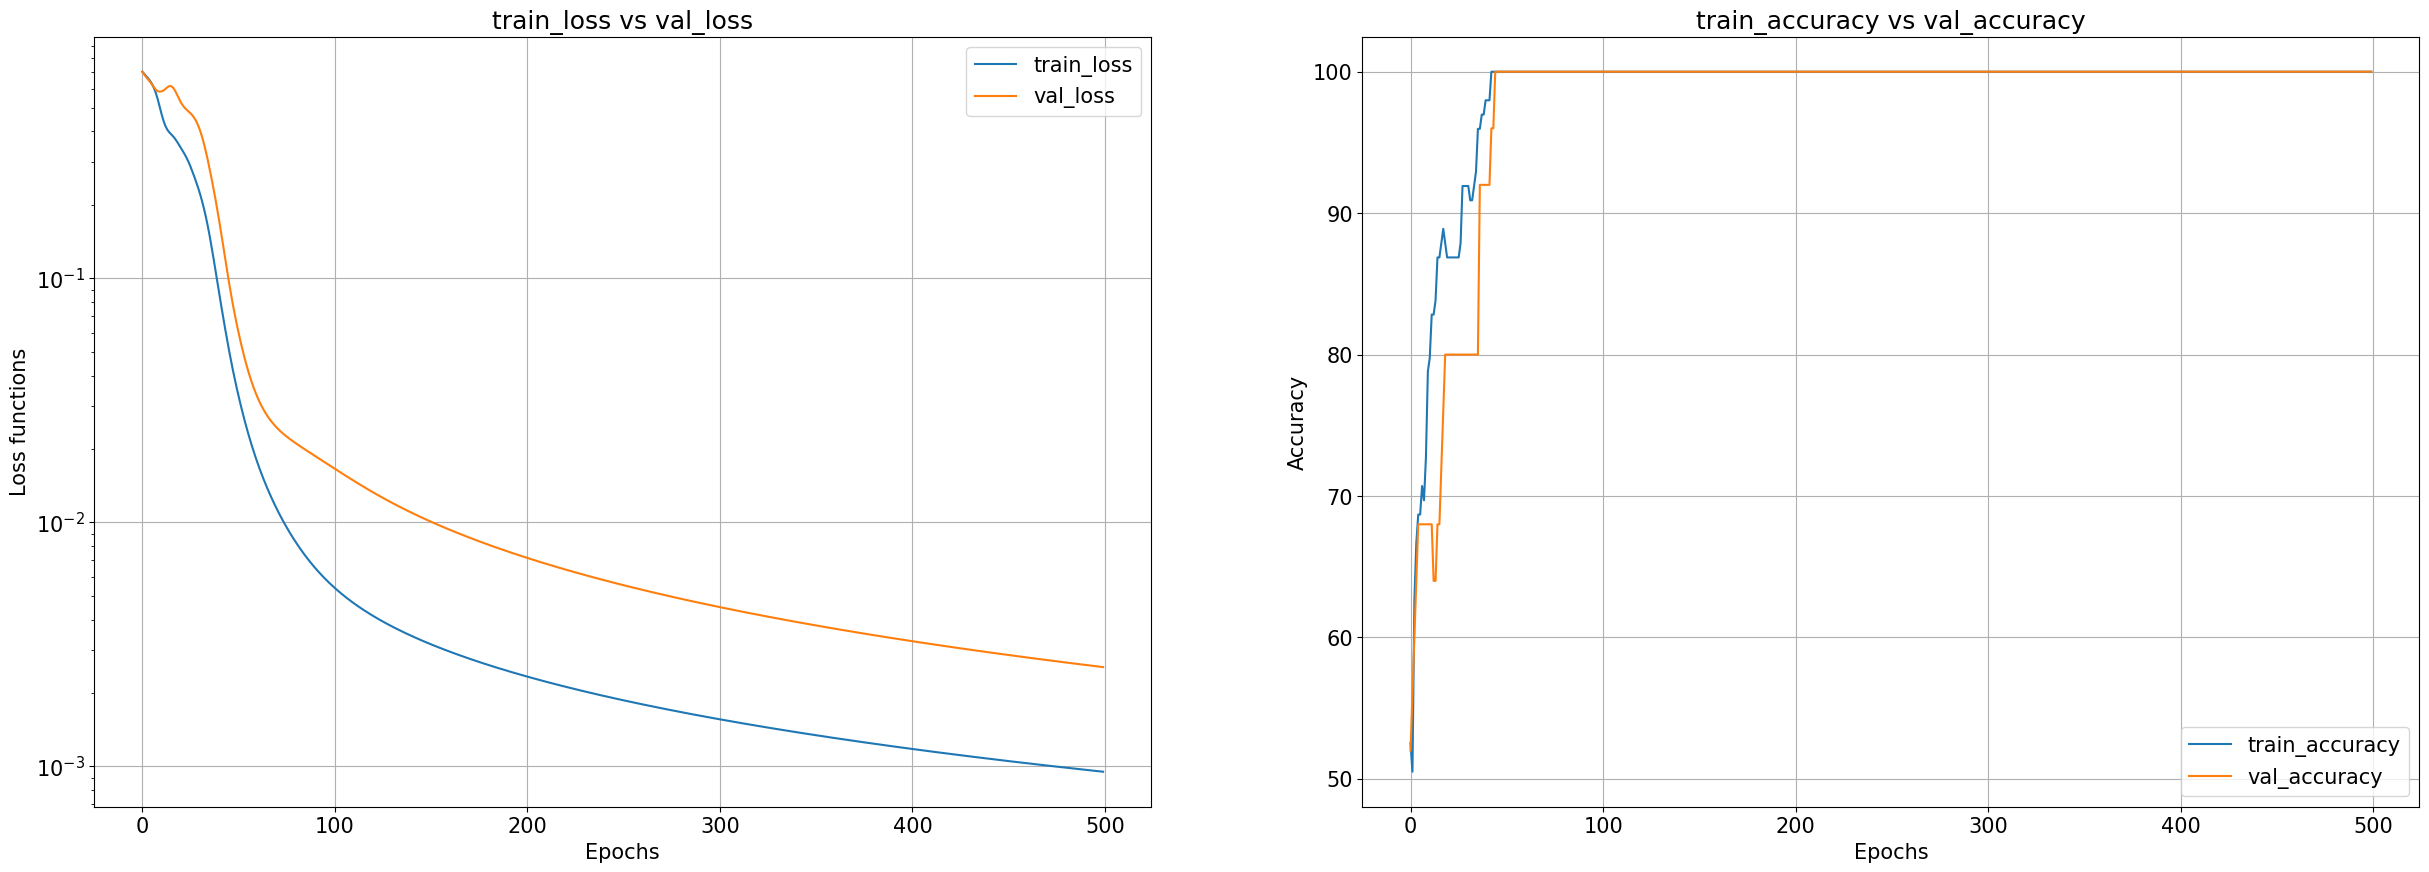

In [69]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_nest['train_loss'],label='train_loss')
plt.plot(history_nest['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_nest['train_accuracy'],label='train_accuracy')
plt.plot(history_nest['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)


### Comparison

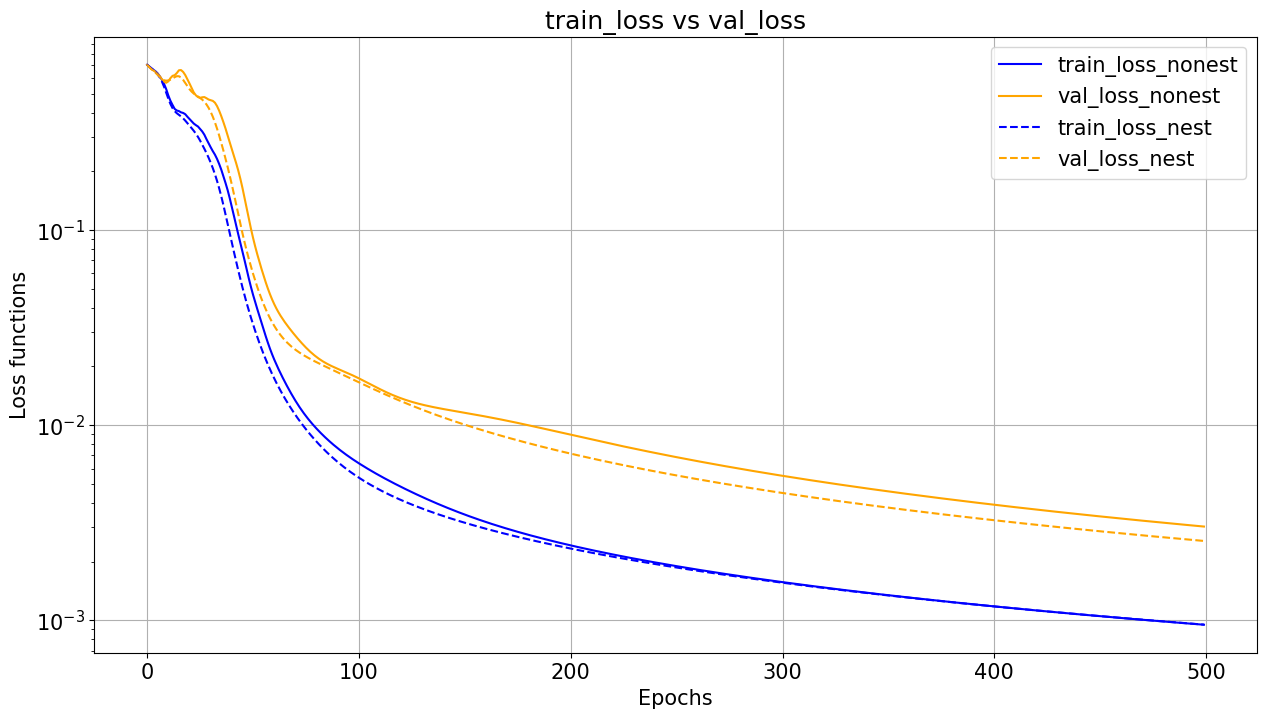

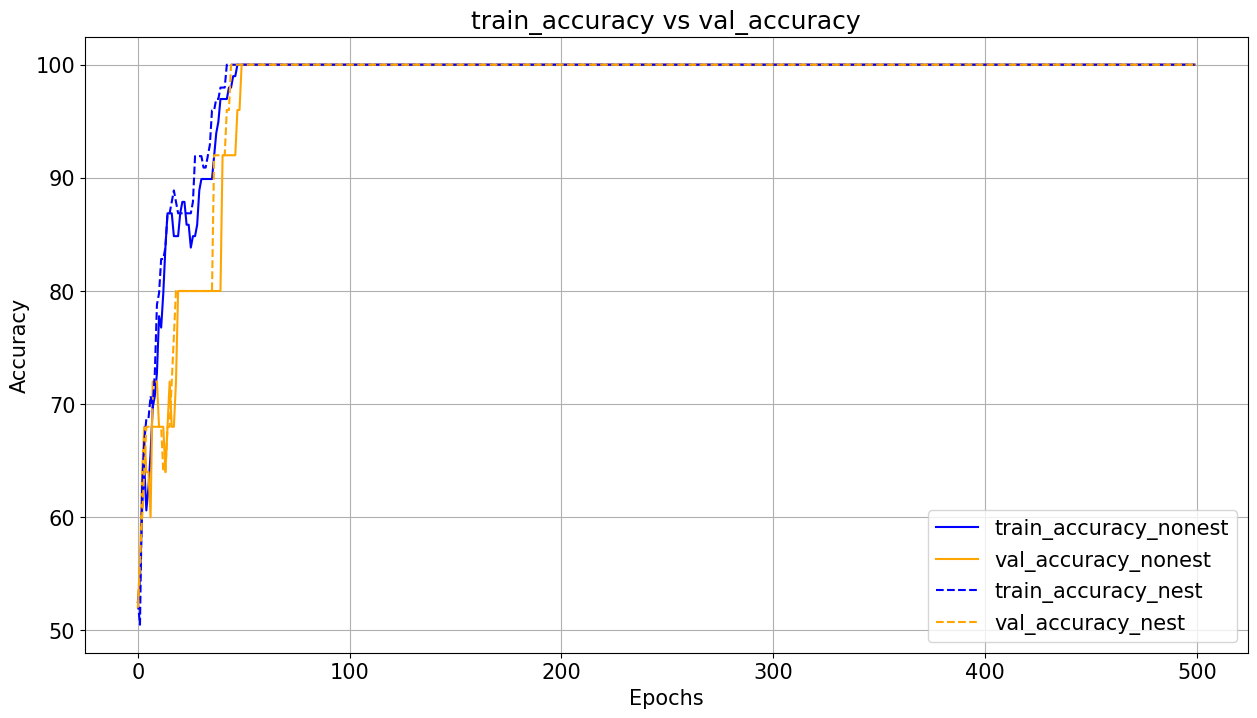

In [70]:
plt.figure(1,figsize=(15,8))
#plt.subplot(1,2,1)
plt.plot(history_nonest['train_loss'], '-', label='train_loss_nonest', color='blue')
plt.plot(history_nonest['val_loss'], '-', label='val_loss_nonest', color='orange')
plt.plot(history_nest['train_loss'], '--', label='train_loss_nest', color='blue')
plt.plot(history_nest['val_loss'], '--', label='val_loss_nest', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.figure(2,figsize=(15,8))
#plt.subplot(1,2,2)
plt.plot(history_nonest['train_accuracy'], '-',label='train_accuracy_nonest', color='blue')
plt.plot(history_nonest['val_accuracy'], '-', label='val_accuracy_nonest', color='orange')
plt.plot(history_nest['train_accuracy'], '--', label='train_accuracy_nest', color='blue')
plt.plot(history_nest['val_accuracy'], '--', label='val_accuracy_nest', color='orange')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

## CUP

Define training and model hyperparameters

In [71]:
orig_params = {'hidden_dim': 50,
        'hidden_act_func': 'tanh',
        'hidden_dim2': 50,
        'hidden_act_func2' : 'tanh',
        'eta': 0.001,
        'lam': 0.000,
        'alpha': 0.9,
        'n_batch': 150,
        'use_opt':0,
        'nest': True,
        'l1_reg' : False,
        'epochs' : 500,
        'loss' : 'MSE',
        'output_act_func': 'lin'
        }
seed = np.random.randint(10,1000)

### Normal momentum

Build model

In [72]:
params = orig_params.copy()
input_layer = Input(X_train_cup.shape[0])
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
o = 2
while True:
    if f'hidden_dim{o}' in params.keys():
        hidden_layer = Layer(hidden_layer, params.pop(f'hidden_dim{o}'), params.pop(f'hidden_act_func{o}'))
        o += 1
    else: break
output_layer = Layer(hidden_layer, 3, params.pop('output_act_func'))

model = NeuralNetwork(input_layer, output_layer, params.pop('loss'), metrics=[MEE])

init_weights_list = model.get_initial_weights_list()

Training with normal momentum:

In [73]:
np.random.seed(seed)
params['nest'] = False
history_nonest = model.train(X_train_cup, y_train_cup,
                                    ** params,
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None
                                    )

Epoch 0: train_loss: 6.003e+02, val_loss: 6.345e+02; train_MEE: 3.717e+01, val_MEE: 3.825e+01  lr : 0.001
Epoch 1: train_loss: 3.241e+02, val_loss: 3.486e+02; train_MEE: 2.644e+01, val_MEE: 2.755e+01  lr : 0.001
Epoch 2: train_loss: 1.396e+02, val_loss: 1.562e+02; train_MEE: 1.764e+01, val_MEE: 1.876e+01  lr : 0.001
Epoch 3: train_loss: 6.178e+01, val_loss: 6.934e+01; train_MEE: 1.206e+01, val_MEE: 1.281e+01  lr : 0.001
Epoch 4: train_loss: 4.853e+01, val_loss: 5.250e+01; train_MEE: 1.089e+01, val_MEE: 1.134e+01  lr : 0.001
Epoch 5: train_loss: 3.588e+01, val_loss: 3.868e+01; train_MEE: 9.500e+00, val_MEE: 9.849e+00  lr : 0.001
Epoch 6: train_loss: 2.783e+01, val_loss: 2.900e+01; train_MEE: 8.245e+00, val_MEE: 8.522e+00  lr : 0.001
Epoch 7: train_loss: 2.219e+01, val_loss: 2.339e+01; train_MEE: 7.287e+00, val_MEE: 7.491e+00  lr : 0.001
Epoch 8: train_loss: 1.744e+01, val_loss: 1.930e+01; train_MEE: 6.528e+00, val_MEE: 6.830e+00  lr : 0.001
Epoch 9: train_loss: 1.335e+01, val_loss: 1.56

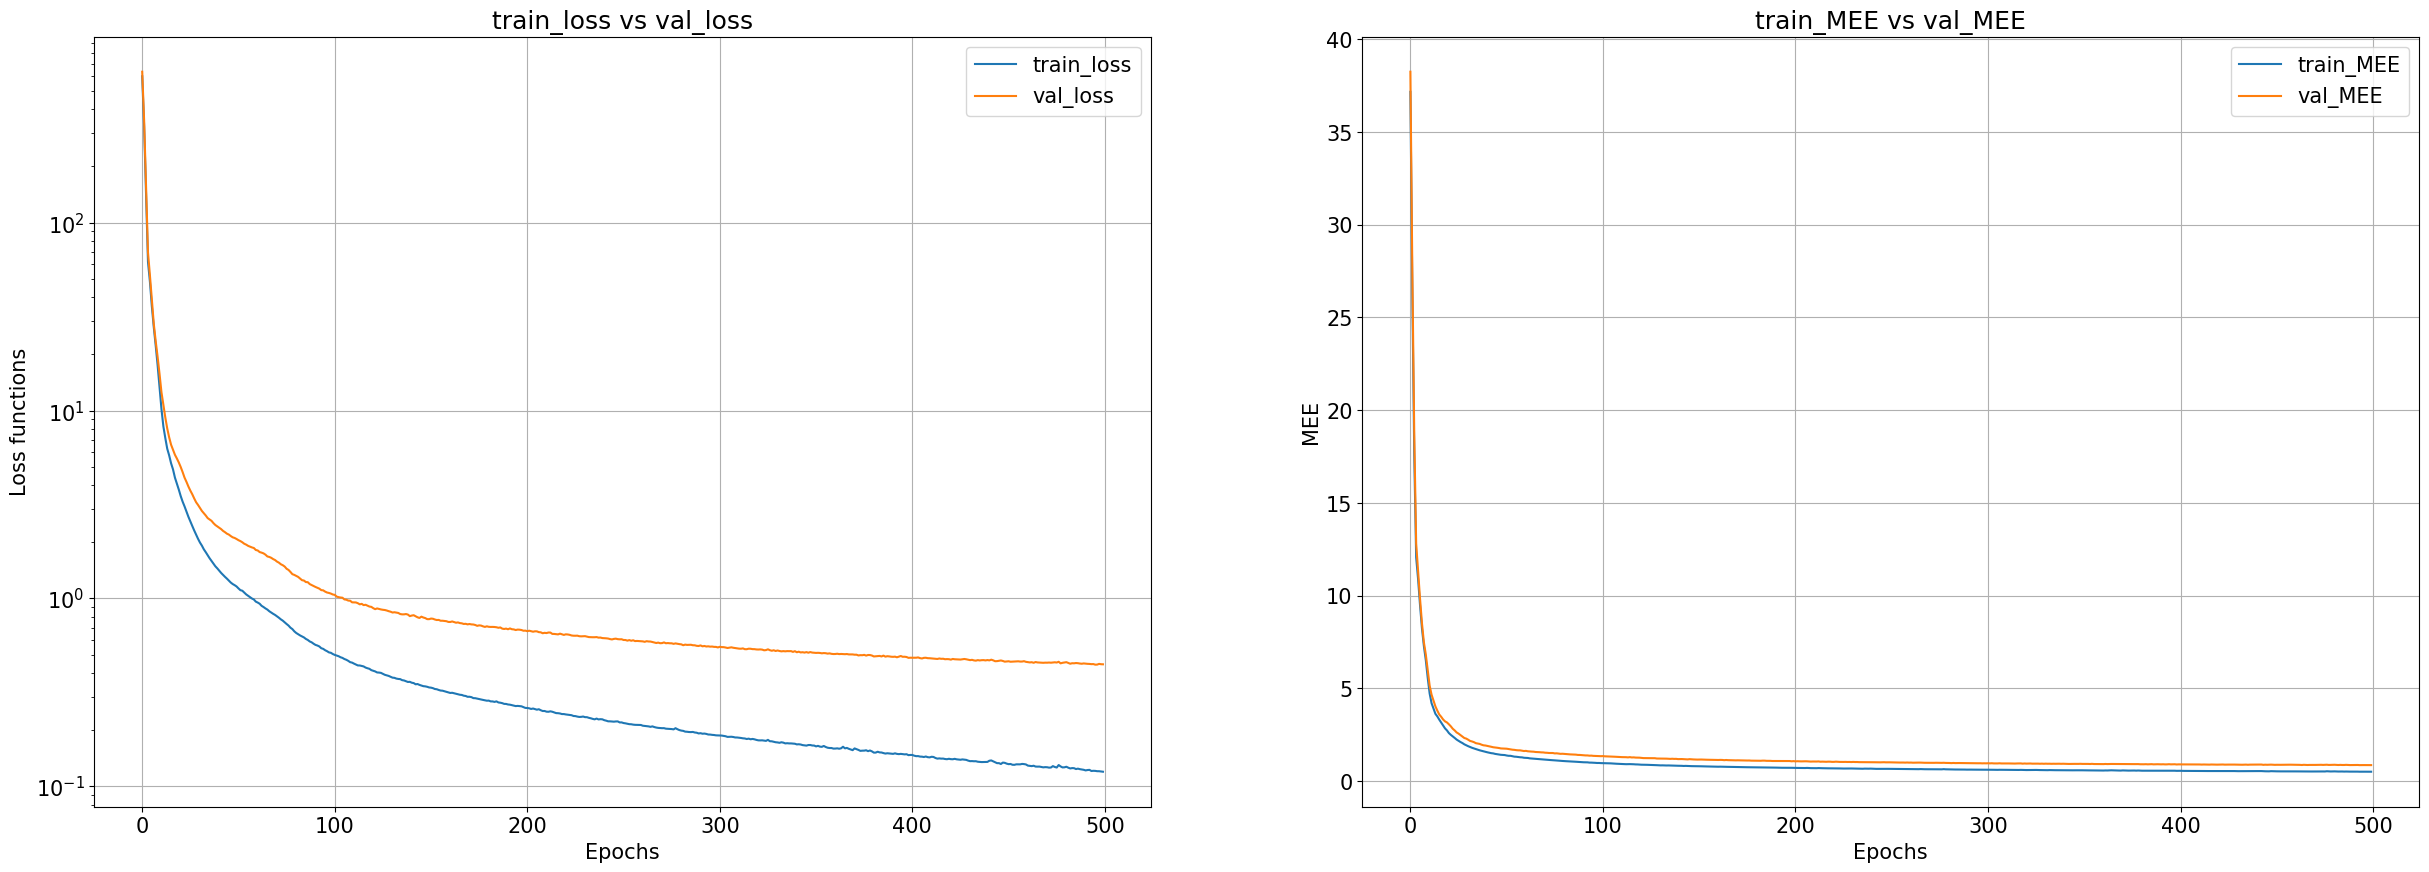

In [74]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_nonest['train_loss'],label='train_loss')
plt.plot(history_nonest['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_nonest['train_MEE'],label='train_MEE')
plt.plot(history_nonest['val_MEE'], label='val_MEE')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

### Nestorov momentum


Build model


In [75]:
params = orig_params.copy()
input_layer = Input(X_train_cup.shape[0])
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
o = 2
while True:
    if f'hidden_dim{o}' in params.keys():
        hidden_layer = Layer(hidden_layer, params.pop(f'hidden_dim{o}'), params.pop(f'hidden_act_func{o}'))
        o += 1
    else: break
output_layer = Layer(hidden_layer, 3, params.pop('output_act_func'))

model = NeuralNetwork(input_layer, output_layer, params.pop('loss'), metrics=[MEE])

model.set_initial_weights(init_weights_list)

Training with L1 regularization:


In [76]:
np.random.seed(seed)
params['nest'] = True
history_nest = model.train(X_train_cup, y_train_cup,
                                    ** params,
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None
                                    )

Epoch 0: train_loss: 6.013e+02, val_loss: 6.354e+02; train_MEE: 3.722e+01, val_MEE: 3.830e+01  lr : 0.001
Epoch 1: train_loss: 3.179e+02, val_loss: 3.424e+02; train_MEE: 2.611e+01, val_MEE: 2.725e+01  lr : 0.001
Epoch 2: train_loss: 1.332e+02, val_loss: 1.496e+02; train_MEE: 1.693e+01, val_MEE: 1.806e+01  lr : 0.001
Epoch 3: train_loss: 5.815e+01, val_loss: 6.527e+01; train_MEE: 1.145e+01, val_MEE: 1.219e+01  lr : 0.001
Epoch 4: train_loss: 3.956e+01, val_loss: 4.370e+01; train_MEE: 9.702e+00, val_MEE: 1.024e+01  lr : 0.001
Epoch 5: train_loss: 2.715e+01, val_loss: 3.006e+01; train_MEE: 8.166e+00, val_MEE: 8.623e+00  lr : 0.001
Epoch 6: train_loss: 2.058e+01, val_loss: 2.218e+01; train_MEE: 7.038e+00, val_MEE: 7.386e+00  lr : 0.001
Epoch 7: train_loss: 1.561e+01, val_loss: 1.732e+01; train_MEE: 6.086e+00, val_MEE: 6.446e+00  lr : 0.001
Epoch 8: train_loss: 1.186e+01, val_loss: 1.374e+01; train_MEE: 5.156e+00, val_MEE: 5.543e+00  lr : 0.001
Epoch 9: train_loss: 9.403e+00, val_loss: 1.15

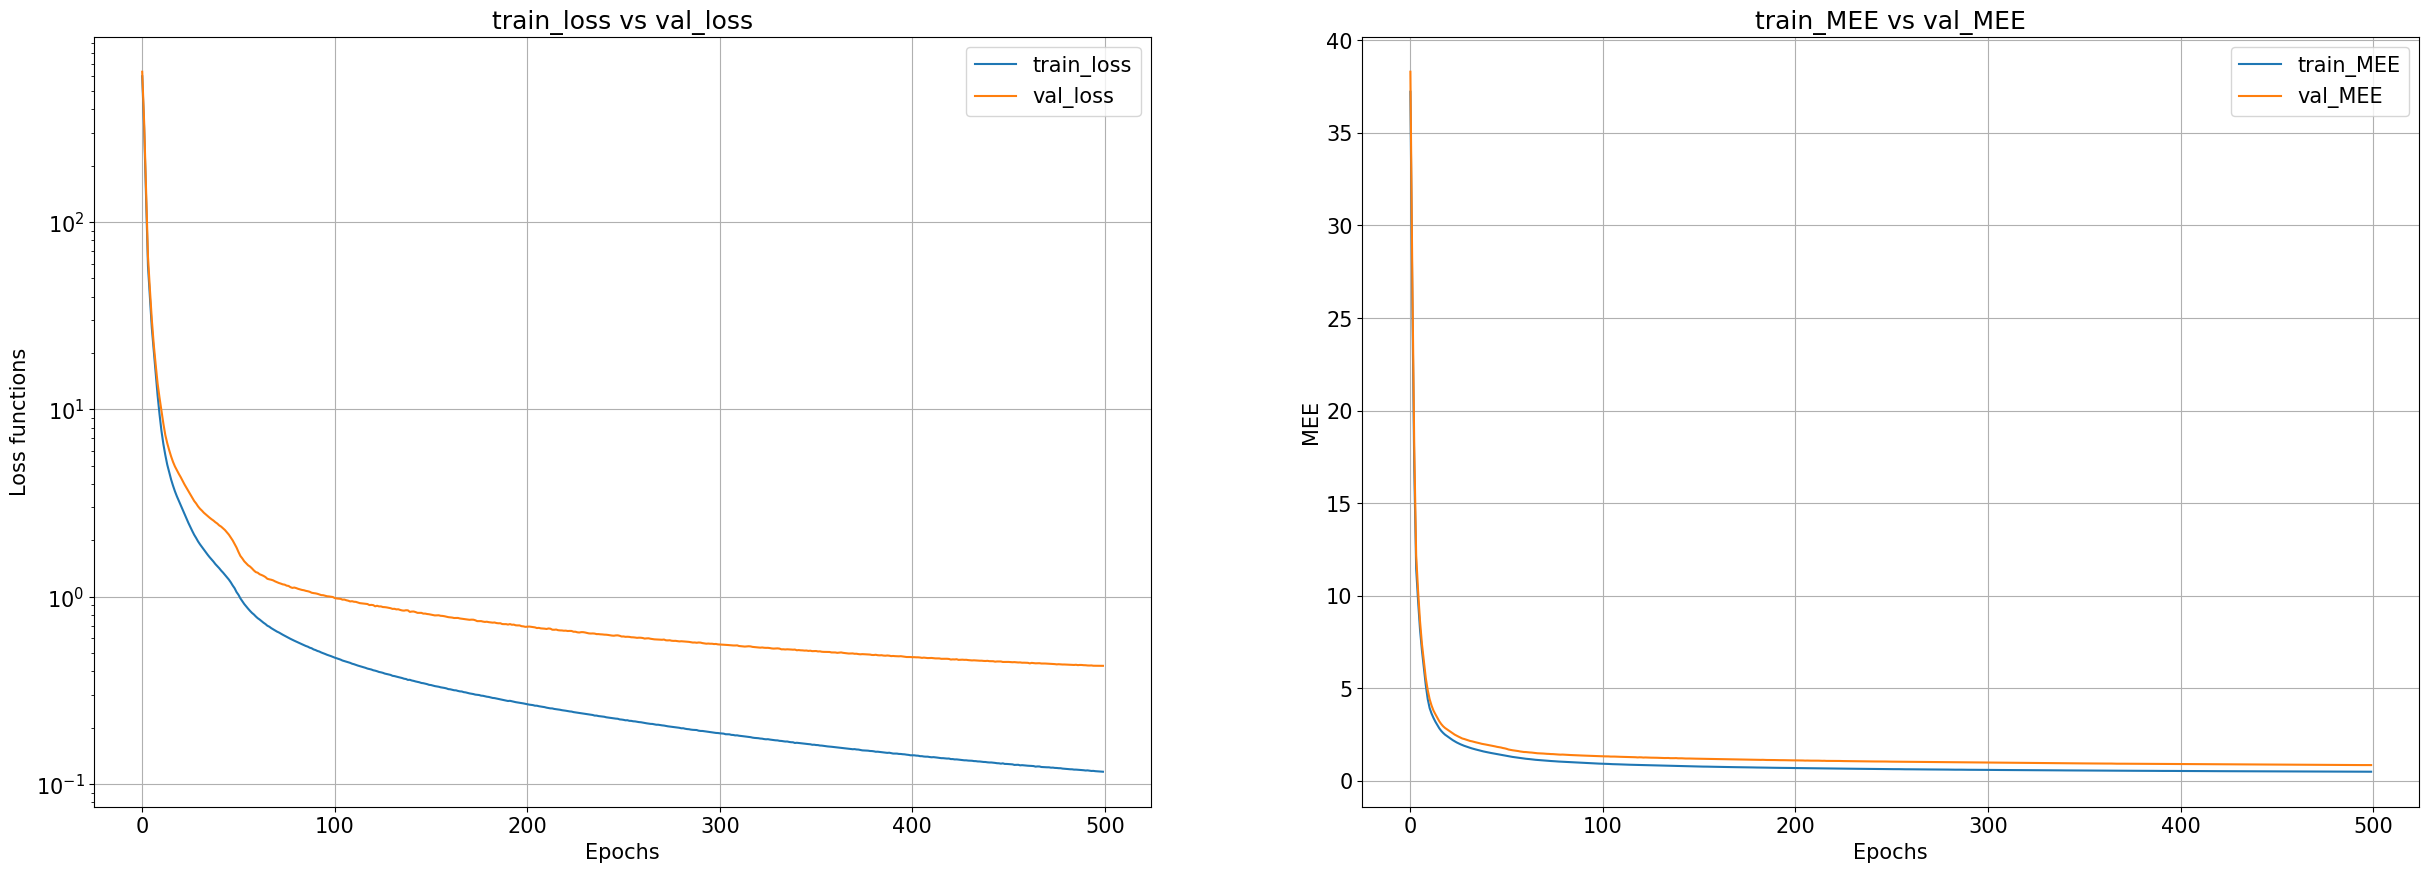

In [77]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_nest['train_loss'],label='train_loss')
plt.plot(history_nest['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_nest['train_MEE'],label='train_MEE')
plt.plot(history_nest['val_MEE'], label='val_MEE')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)


### Comparison

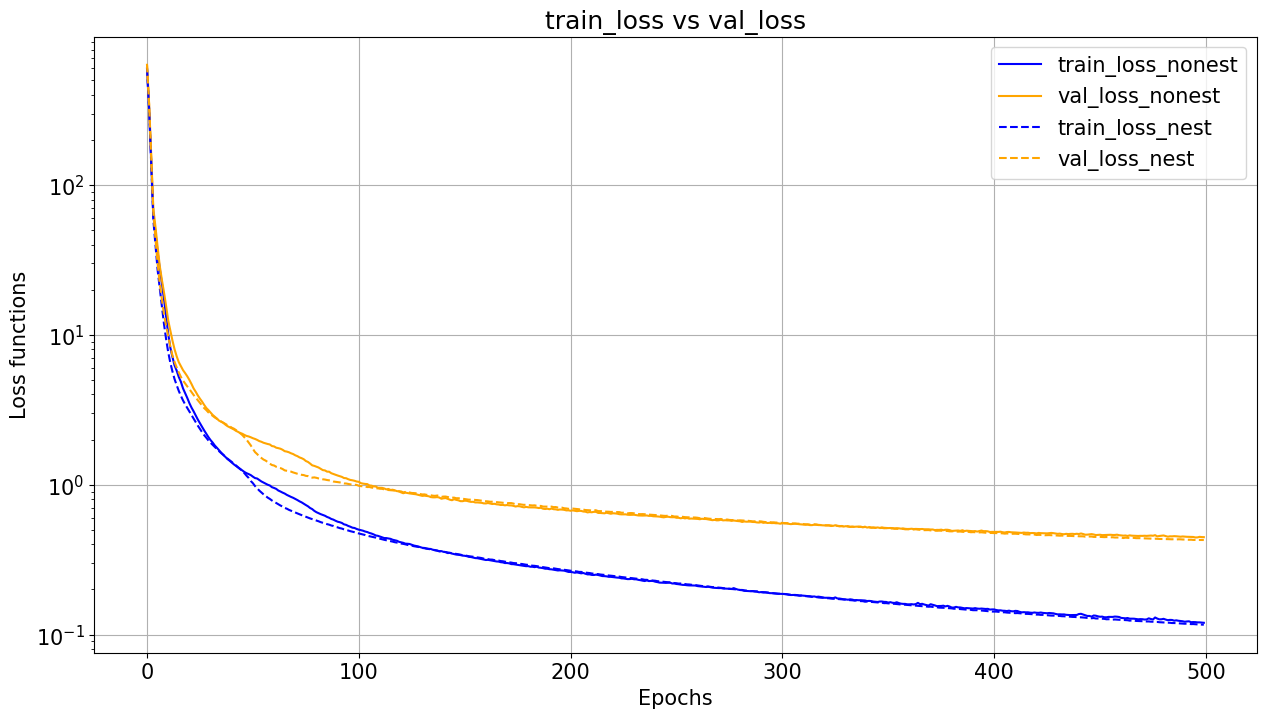

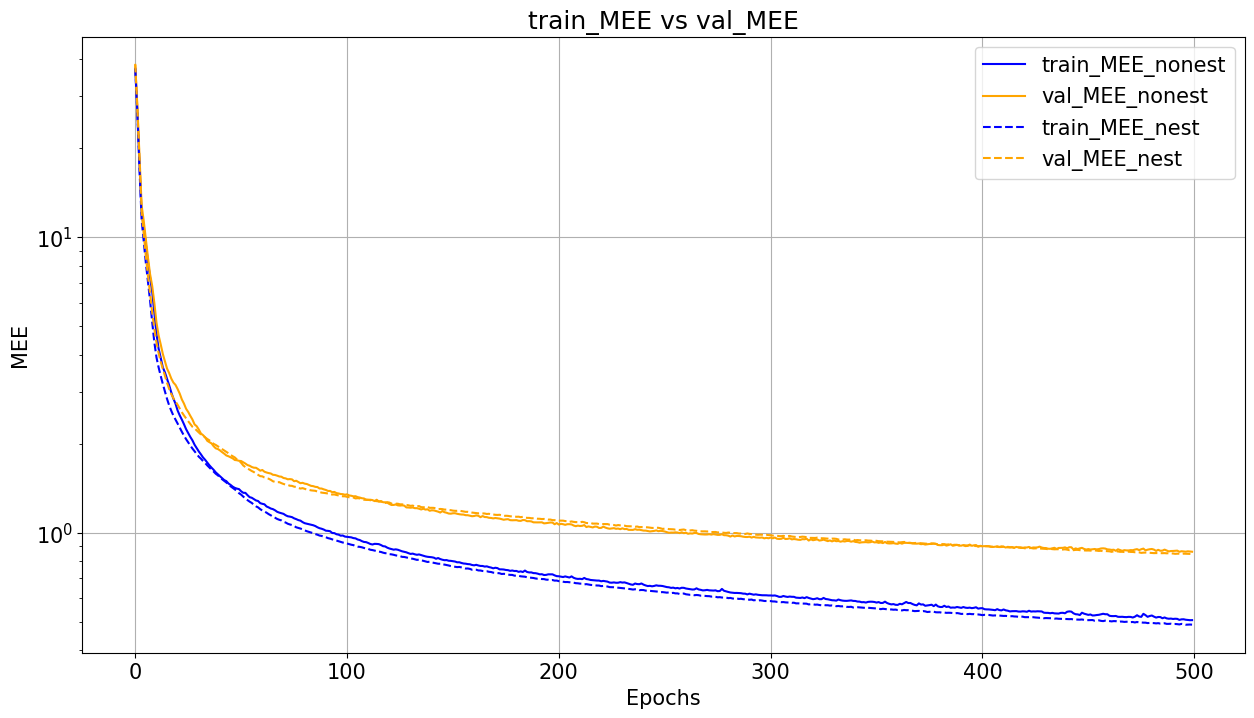

In [78]:
plt.figure(1,figsize=(15,8))
#plt.subplot(1,2,1)
plt.plot(history_nonest['train_loss'], '-', label='train_loss_nonest', color='blue')
plt.plot(history_nonest['val_loss'], '-', label='val_loss_nonest', color='orange')
plt.plot(history_nest['train_loss'], '--', label='train_loss_nest', color='blue')
plt.plot(history_nest['val_loss'], '--', label='val_loss_nest', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.figure(2,figsize=(15,8))
#plt.subplot(1,2,2)
plt.plot(history_nonest['train_MEE'], '-',label='train_MEE_nonest', color='blue')
plt.plot(history_nonest['val_MEE'], '-', label='val_MEE_nonest', color='orange')
plt.plot(history_nest['train_MEE'], '--', label='train_MEE_nest', color='blue')
plt.plot(history_nest['val_MEE'], '--', label='val_MEE_nest', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)